# Εθνικό Μετσόβιο Πολυτεχνείο
### Σχολή Ηλεκτρολόγων Μηχανικών και Μηχανικών Υπολογιστών
### Τομέας Σημάτων, Ελέγχου και Ρομποτικής
### Εργαστήριο Όρασης Υπολογιστών, Επικοινωνίας Λόγου και Επεξεργασίας Σημάτων
### Επεξεργασία Φωνής και Φυσικής Γλώσσας

### --------------------------- 2ο Εργαστήριο: Αναγνώριση φωνής με το KALDI TOOLKIT --------------------------
##### Ακ. Έτος: 2019 - 2020      -      Εξάμηνο: 7o

#### Βασιλείου Βασιλική - 03115033                 Ψαρουδάκης Ανδρέας - 03116001

## ___1. Περιγραφή___

Σκοπός της παρούσας εργαστηριακής άσκησης είναι η χρήση του εργαλείου __Kaldi__ για την υλοποίηση ενός συστήματος επεξεργασίας και αναγνώρισης φωνής. Συγκεκριμένα,ως δεδομένα, έχουμε ηχογραφήσεις της USC-TIMIT από 4 διαφορετικούς ομιλητές αλλά και τα transcriptions, ώστε να εκπαιδεύσουμε και να εκτιμήσουμε το σύστημα μας. Η διαδικασία σχεδιασμού του συστήματος μπορεί να χωριστεί σε 4 μέρη. Αρχικά, καλούμαστε να εξάγουμε κατάλληλα ακουστικά χαρακτηριστικά από τα φωνητικά δεδομένα - MFCCs (Mel-Frequency Cepstral Coefficients). Τα εν λόγω χαρακτηριστικά είναι στην ουσία ένας αριθμός συντελεστών cepstrum που εξάγονται μετά από ανάλυση των σημάτων φωνής με μια ειδικά σχεδιασμένη συστοιχία φίλτρων (Mel filterbank). Η συστοιχία αυτή είναι εμπνευσμένη από το μη γραμμικό τρόπο που το ανθρώπινο αυτί αντιλαβάνεται τον ήχο και ειδικά σχεδιασμένη από ψυχοακουστικές μελέτες. Στη συνέχεια, δημιουργούμε γλωσσικά μοντέλα από τα trancriptions που προαναφέραμε, τα οποία θα δίνουν την a priori πιθανότητα στο τελικό σύστημα. Ακολουθεί η εκπαίδευση των ακουστικών μοντέλων με βάση τα MFCCs που εξάγαμε. Συνδυάζοντας εν τέλει όλα τα προηγούμενα, σχηματίζουμε το τελικό σύστημα αναγνώρισης φωνής. Συμπερασματικά, γίνεται κατανοητό ότι καλούμαστε να δημιουργήσουμε ένα σύστημα αναγνώρισης φωνής που δέχεται ως είσοδο ένα σήμα φωνής, βρίσκει τα ακουστικά χαρακτηριστικά και τα χρησιμοποιεί για να αποκωδικοποιήσει το σήμα σε μία ακολουθία φωνημάτων ή λέξεων.

## 2. Θεωρητικό Υπόβαθρο

### A) __MFCCs__
Όπως αναφέραμε και στην περιγραφή η πρώτη φάση της διαδικασίας σχεδιασμού ενός συστήματος επεξεργασίας και αναγνώρισης φωνής είναι η εξαγωγή φωνητικών δεδομένων MFCCs. Η εξαγωγή αυτή γίνεται σε πέντε στάδια, τα οποία αναλυτικά είναι:
1. ___Προέμφαση (Pre-Emphasis):___ Μέσω αυτής επιτυγχάνουμε α) ισορροπία του φάσματος συχνοτήτων, δεδομένου ότι οι υψηλές συχνότητες έχουν συνήθως μικρότερα μεγέθη σε σύγκριση με χαμηλότερες συχνότητες, β) αποφυγή των αριθμητικών προβλημάτων κατά τη διάρκεια του μετασχηματισμού Fourier και γ) βελτίωση του σηματοθορυβικού λόγου (SNR).          
Το φίλτρο αυτό εφαρμόζεται στο σήμα μέσω της εξίσωσης: $ y(t)=x(t)−αx(t−1)$.


2. ___Πλαισίωση (Framing) & Παραθυροποίηση (Windowing):___ Η πλαισίωση αποτελεί ένα σημαντικό στάδιο καθώς μέσω αυτής "σπάμε" το σήμα σε μικρότερα πλαίσια και στη συνέχεια εφαρμόζουμε μετασχηματιμό Fourier σε αυτά. Σε αντίθετη περίπτωση, επειδή οι συχνότητες αλλάζουν διαρκώς με τον χρόνο, αν εφαρμόζαμε μετασχηματισμό Fourier σε ολόκληρο το σήμα θα χάναμε σημαντική πληροφορία (frequency contours). Στο σημείο αυτό αξίζει να αναφέρουμε ότι η πλαισίωση γίνεται σε πλαίσια 20 ~ 40 ms με overlap γύρω στο 50%. Στη συνέχεια για να αντισταθμίσουμε την παραδοχή του FFT ότι τα δεδομένα είναι άπειρα και για να μειώσουμε την φασματική διαρροή εφαρμόζουμε κάποιο παράθυρο στα πλαίσια. Η πιο συνηθισμένη παραθυροποίηση που χρησιμοποείται είναι τα hamming παράθυρα. Ένα παράθυρο Hamming έχει την ακόλουθη μορφή: 

$$ w(n) = 0.54 - 0.46cos\left(\frac{2\pi{n}}{M-1}\right) \qquad 0 \leq n \leq M-1 $$

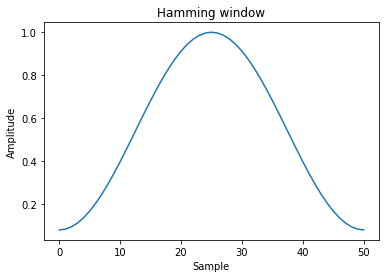

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
window = np.hamming(51)
plt.plot(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

3. ___Fourier-Transform && Power Spectrum:___ Αρχικά υπολογίζουμε το φάσμα συχνοτήτων και στη συνέχεια το χρησιμοποιούμε για να υπολογίσμουμε το φάσμα ισχύος, το οποίο δίνεται από την σχέση: 
$$ P = \frac{|FFT(x_i)|^2}{N} $$


4. ___Filter Banks:___ Για να εφαρμόσουμε τα Filter Banks πρέπει αρχικά να εφαρμόσουμε κάποια τριγωνικά φίλτρα (συνήθως 40). Χρησιμοποιούμε την κλίμακα Mel προσπαθώντας να προσομοιώσουμε την αντίληψη του ήχου από τον άνθρωπο. Αυτό επιτυγχάνεται καθιστώντας πιο διακριτικές τις χαμηλότερες συχνότητες και λιγότερο διακριτικές τις υψηλότερες συχνότητες. Η μετατροπή στην κλίμακα Mel γίνεται με τις ακόλουθες σχέσεις: 

$$ m = 2595 \log_{10} (1 + \frac{f}{700}) $$ $$ f = 700 (10^{m/2595} - 1) $$


5. ___Discrete cosine transform:___ Οι συντελεστές που υπολογίστηκαν στο προηγούμενο βήμα είναι πολύ συσχετισμένοι, οπότε εφαρμόζουμε τον DCT για να μειώσουμε την συσχέτιση αυτή που μπορεί να προκαλέσει προβλήματα.

Όλα τα προηγούμενα βήματα φαίνονται στην επόμενη εικόνα:

<a href="https://imgbb.com/"><img src="https://i.ibb.co/R26Fx47/Screenshot-2019-12-28-Microsoft-Word-27-NVEC10086-27-NVEC10086-pdf.png" alt="Screenshot-2019-12-28-Microsoft-Word-27-NVEC10086-27-NVEC10086-pdf" border="0"></a>

### __B) Γλωσσικά Μοντέλα__

Τα γλωσσικά μοντέλα ορίζουν πιθανότητες ακολουθιών λέξεων (a-priori) με βάση το likelihood της συγκεκριμένης ακολουθίας στο εξεταζόμενο dataset από το μοντέλο αναγνώρισης μας. Ο σκοπός του γλωσσικού μοντέλου ή της γραμματικής είναι να επιτρέψει τον υπολογισμό της a priori πιθανότητας, $P_L(W)$, μιας λέξης συμβολοσειράς, $W$, σύμφωνα με την εργασία αναγνώρισης. Για την δημιουργία γλωσσικού μοντέλου χρησιμοποιούμε μια στατιστική γραμματική. Για κάθε πρόταση στο σύνολο εκπαίδευσης, έχουμε ένα αρχείο κειμένου που προσδιορίζει τις λέξεις αυτής της πρότασης. Εάν κάνουμε την υπόθεση ότι η πιθανότητα μιας λέξης σε μια πρόταση εξαρτάται μόνο από τις προηγούμενες λέξεις N-1, έχουμε τη βάση για ένα μοντέλο γλωσσών N-gram. Στην περίπτωση μας κάνουμε αναγωγή της προηγούμενης περιγραφής σε φωνήματα και λέξεις αντίστοιχα. Τέλος σημειώνουμε ότι θα αχοληθούμε με unigram και bigram μοντέλα τα οποία το Kaldi Tool θα συνδυάσει προκειμένου να έχουμε τα βέλτιστα αποτελέσματα.

### __Γ) Φωνητικά Μοντέλα__

Τα φωνητικά μοντέλα χρησιμοποιούνται για τον υπολογισμό της δεσμευμένης πιθανότητας του κριτηρίου likelihood. Η ακουστική εκπαίδευση (ΑΜ) βασίζεται σε φράσεις ομιλίας με ετικέτες που είναι ταξινομημένες σύμφωνα με το αντίστοιχο transcription. Στην πλειονότητα των περιπτώσεων χρησιμοποιούμε Κρυφά Μαρκοβιανά Μοντέλα (HMM) για κάθε φώνημα. Συνεπώς το HMM της λέξης είναι η σύνδεση των HMM των φωνημάτων και αντίστοιχα το HMM των συμβολοσειρών είναι η συνένωση των HMMs των λέξεων που τις απαρτίζουν. Ένα παράδειγμα 5 καταστάσεων αριστερά προς τα δεξιά HMM φαίνεται στην επόμενη εικόνα:
<a href="https://imgbb.com/"><img src="https://i.ibb.co/FVyrCXH/Screenshot-2019-12-28-MC-He-Ch02-indd-MC-He-Ch02-pdf.png" alt="Screenshot-2019-12-28-MC-He-Ch02-indd-MC-He-Ch02-pdf" border="0"></a>

## 3. Βήματα προπαρασκευής

Για την προπαρασκευή του εργαστηρίου αφού ακολουθήσαμε τις οδηγίες για την εγκατάσταση του kaldi στη συνέχεια κατεβάσαμε τα δεδομένα που χρειαζόμαστε για την εκτέλεση της εργαστηριακής άσκησης. Σημειώνουμε ότι όλα τα δεδομένα και οι κώδικες της παρούσας εργαστηριακής άσκησης βρίσκονται στο directory: ___~/Documents/SLP_Lab2/kaldi___. Αρχικά, μέσα στο φάκελο egs δημιουργούμε ένα φάκελο usc, μέσα στον οποίο θα εργάζόμαστε από εδώ και πέρα.

In [3]:
!mkdir ~/Documents/SLP_Lab2/kaldi/egs/usc
!echo "usc folder is ok"

usc folder is ok


In [4]:
!mkdir ~/Documents/SLP_Lab2/kaldi/egs/usc/data
!mkdir ~/Documents/SLP_Lab2/kaldi/egs/usc/data/train
!mkdir ~/Documents/SLP_Lab2/kaldi/egs/usc/data/test
!mkdir ~/Documents/SLP_Lab2/kaldi/egs/usc/data/dev
!echo "all necessary folders are ok"

all necessary folders are ok


Στη συνέχεια αντιγράφουμε τους φακέλους lab2_help_scripts και slp_lab2_data στο directory που δημιουργήσαμε (για την δικιά μας περίπτωση είναι ___~/Documents/SLP_Lab2/kaldi/egs/usc___). Αντιγράφουμε επίσης τα python και bash scripts που υλοποιήσαμε για την εκτέλεση των υπολοίπων βημάτων της εργαστηριακής άσκησης. Τα script αυτά σας επισυνάπτονται στον φάκελο με τα παραδοτέα. Έχοντας πλέον όλα τα απαραίτητα αρχεία καλούμε το 3.sh bash script που δημιουργήσαμε για την υλοποίηση του παρόντος βήματος.

In [5]:
!~/Documents/SLP_Lab2/kaldi/egs/usc/3.sh

all uttids files are ok
all utt2spk files are ok
all wav.scp files are ok
all text files are ok
all new text files are ok
Step 3 is OK!


To script 3.sh υλοποιεί αναλυτικά όσα ζητούνται στο βήμα 3. Συγκεκριμένα για την δημιουργία των:
* ___uttids___ αρχείων αντιγράφουμε το περιεχόμενο των αντίστοιχων φακέλων των δεδομένων μας μέσω της εντολής ___cat___.
* ___utt2spk___ αρχείων υλοποιήσαμε το utt2spk.py script που σε κάθε γραμμή γράφει τον ομιλητή που αντιστοιχεί σε κάθε πρόταση και είναι της μορφής: utterance_id_1 <κενό> speaker_id, όπου ως speaker_id επιλέγουμε αντίστοιχα τα m1, m3, f1, f5.
* ___wav.scp___ αρχείων υλοποιήσαμε το wav_scp.py script που σε κάθε γραμμή γράφει τη θέση του αρχείου ήχου και είναι της μορφής:                                                                                                                                 
utterance_id_1 <κενό> /path/to/wav1.
* ___text___ αρχείων υλοποιήσαμε το text.py script που σε κάθε γραμμή γράφει το κείμενο που αντιστοιχεί στην κάθε πρόταση και είναι της μορφής: utterance_id_1 <κενό> <utterance 1 text>.

Στη συνέχεια για κάθε αρχείο text που δημιουργούμε αντικαθιστούμε τις λέξεις που περιέχουν οι προτάσεις με τις αντίστοιχες αλληλουχίες φωνημάτων. Για την υλοποίηση αυτού δημιουργήσαμε το script text_to_phonem.py στο οποίο αρχικά δημιουργούμε με βάση το αρχείο lexicon.txt ένα dictionary μεταξύ των λέξεων και της αντίστοιχης αλληλουχίας φωνημάτων. Στη συνέχεια, υλοποιούμε την συνάρτηση tokenize ωστε να μετατρέψουμε όλους τους χαρακτήρες σε πεζούς, να αφαιρέσουμε όλους τους ειδικούς χαρακτήρες εκτός από την απόστροφο καθώς και να σπάσουμε λέξεις που ενώνονται με - ώστε να μπορέσουμε να τις διαχειριστούμε στη συνέχεια. Τέλος, κάθε πρόταση του εκάστωτε αρχείου text την περνάμε από την συνάρτηση tokenize, γράφουμε στην αρχή το φώνημα της σιωπής ακολουθούν οι αλληλουχίες φωνημάτων και τέλος ξανά το φώνημα της σιωπής. Τα παραπάνω αποθηκεύονται στα αρχεία new_text.
Τελικά, διαγράφουμε τα αρχικά αρχεία text, μετονομάζουμε τα αρχεία new_text σε text και τυπώνουμε μήνυμα ότι το βήμα 3 ολοκληρώθηκε επιτυχώς!

## 4. Βήματα κυρίως μέρους
### 4.1 Προετοιμασία διαδικασίας αναγνώρισης φωνής για τη USC-TIMIT

Από τη διαδικασία για τη Wall Street Journal (wsj) που βρίσκεται στο φάκελο egs παίρνουμε τα αρχεία path.sh και cmd.sh. Στο αρχείο path.sh πρέπει να θέσουμε τη μεταβλητή KALDI_ROOT στο directory που βρίσκεται ο κύριος φάκελος της εγκατάστασης του Kaldi ενώ στο cmd.sh αλλάζουμε τις τιμές των μεταβλητών train_cmd, decode_cmd και cuda_cmd σε ’run.pl’. Αντιγράφουμε τα νέα αρχεία στο ___~/Documents/SLP_Lab2/kaldi/egs/usc___. Έχοντας πλέον όλα τα απαραίτητα αρχεία καλούμε το 4_1.sh bash script που δημιουργήσαμε για την υλοποίηση του παρόντος βήματος.

In [6]:
!~/Documents/SLP_Lab2/kaldi/egs/usc/4_1.sh

We make file path.sh as source so that we have all kaldi commands available
We create soft links for the folders steps and utils
We create a folder local and inside it we create a soft link for the the file score_kaldi.sh
We create a folder conf and inside it we copy the file mfcc.conf
We create a folder lang and a folder local inside folder data. Inside folder local we create folders dict, lm_tmp and nist_lm


Το script αυτό υλοποιεί τα παρακάτω ζητούμενα του βήματος αυτού:
1. Δημιουργείστε soft links μέσα στο φάκελο της δικής σας διαδικασίας με ονόματα ’steps’ και ’utils’ τα οποία θαδείχνουν στους αντίστοιχους φακέλους της wsj.
2. Δημιουργείστε το φάκελο local και μέσα σε αυτόν ένα soft link που να δείχνει στο αρχείο score_kaldi.sh που βρίσκεται μέσα στο ’steps’.
3. Δημιουργείστε το φάκελο conf και μέσα σε αυτόν αντιγράψτε το αρχείο mfcc.conf που σας δώθηκε στις διευκρινίσεις.
4. Τέλος, δημιουργείστε τους εξής φακέλους:data/lang,data/local/dict,data/local/lm_tmp,data/local/nist_lm.

Σημειώνουμε ότι το path.sh αρχείο το κάνουμε source στην αρχή κάθε bash script μας από εδώ και πέρα, ώστε να έχουμε διαθέσιμες όλες τις εντολές του Kaldi. Επίσης για την δημιουργία soft links χρησιμοποιούμε την εντολή ln -s του bash, ενώ για την αντιγραφή ενός αρχείου χρησιμοποιούμε την εντολή cp.

### 4.2 Προετοιμασία γλωσσικού μοντέλου

In [7]:
!~/Documents/SLP_Lab2/kaldi/egs/usc/4_2.sh

Inside folder local/data/dict we create files silence_phones.txt and optional_silence.txt that contain only the phonem sil
LOGFILE:/dev/null
$bin/ngt -i="$inpfile" -n=$order -gooout=y -o="$gzip -c > $tmpdir/ngram.${sdict}.gz" -fd="$tmpdir/$sdict" $dictionary $additional_parameters >> $logfile 2>&1
$scr/build-sublm.pl $verbose $prune $prune_thr_str $smoothing "$additional_smoothing_parameters" --size $order --ngrams "$gunzip -c $tmpdir/ngram.${sdict}.gz" -sublm $tmpdir/lm.$sdict $additional_parameters >> $logfile 2>&1
$scr/build-sublm.pl $verbose $prune $prune_thr_str $smoothing "$additional_smoothing_parameters" --size $order --ngrams "$gunzip -c $tmpdir/ngram.${sdict}.gz" -sublm $tmpdir/lm.$sdict $additional_parameters >> $logfile 2>&1
LOGFILE:/dev/null
$bin/ngt -i="$inpfile" -n=$order -gooout=y -o="$gzip -c > $tmpdir/ngram.${sdict}.gz" -fd="$tmpdir/$sdict" $dictionary $additional_parameters >> $logfile 2>&1
$bin/ngt -i="$inpfile" -n=$order -gooout=y -o="$gzip -c > $tmpdir/ngram.${sdi

Όσον αφορά τη δημιουργία του γλωσσικού μοντέλου ___(4.2.1)___ το script αυτό υλοποιεί μέσα στον φάκελο data/local/dict τα επόμενα:
* Δημιουργεί τα αρχεία ___silence_phones.txt___ και ___optional_silence.txt___ και γράφει μέσα σε αυτά μόνο το φώνημα της σιωπής χρησιμοποιώντας την bash εντολή echo.
* Τρέχει το python script nonsilence_phones.py. Το script αυτό δέχεται ως είσοδο το lexicon.txt των δεδομένων μας και κρατά σε μια λίστα όλα τα φωνήματα που αντιστοιχούν στις λέξεις μόνο μία φορά παραλείποντας συγχρόνως και το φώνημα της σιωπής. Στη συνέχεια ταξινομεί τα φωνήματα αυτά και τα γράφει στο αρχείο ___nonsilence_phones.txt___.
* Δημιουργεί το λεξικό του γλωσσικού μας μοντέλου, το οποίο είναι μία 1-1 αντιστοιχία των φωνημάτων με τον εαυτό τους. Αυτό γίνεται μέσω του lexicon.py script που δημιουργήσαμε. Συγκεκριμένα αυτό το script αντιγράφει τα περιεχόμενα του προηγούμενου αρχείου και τα γράφει σε ένα καινούριο δύο φορές με ένα κενό ανάμεσα αφού αρχικά προσθέσει και το φώνημα sil που δεν περιέχεται στο προηγούμενο αρχείο. Έτσι δημιουργούμε το αρχείο ___lexicon.txt___ το οποίο ταξινομούμε ξανά μέσω της εντολής sort του bash ώστε να ταξινομηθεί και το φώνημα της σιωπής.
* Δημιουργεί τα αρχεία ___lm_test.text___, ___lm_dev.text___ και ___lm_train.text___ κρατώντας μόνο τις προτάσεις από το αρχείο text και προσθέτοντας πρίν από αυτές το < s> και στο τέλος το < /s >. Στο σημείο αυτό σημειώνουμε ότι απορίφθηκαν τα id κάθε πρότασης προς αποφυγήν των πολλαπλών warrning που δημιουργούσαν. 
* Τέλος δημιουργεί το κενό αρχείο ___extra_questions.txt___ μέσω της bash εντολής touch.

Όσον αφορά την ενδιάμεση μορφή του γλωσσικού μοντέλου ___(4.2.2)___, το script καλεί την εντολή build-lm.sh του πακέτου IRSTLM που έχει εγκατασταθεί μαζί με το Kaldi, __build-lm.sh -i <αρχείο lm_train.text> -n <τάξη γλωσσικού μοντέλου> -o <αρχείο_εξόδου.ilm.gz>__ συνολικά 6 φορές. Η παράμετρος -n παίρνει την τιμή 1 για τα unigram μοντέλα και την τιμή 2 για τα bigram μοντέλα. Τα αρχεία αποθηκεύονται στον φάκελο data/local/lm_tmp.

Στη συνέχεια αποθηκεύεται το compiled γλωσσικό μοντέλο σε μορφή ARPA ___(4.2.3)___ χρησιμοποιώντας την εντολή __compile-lm <αρχείο .ilm.gz> -t=yes /dev/stdout | grep -v unk | gzip -c > <αρχείο_εξόδου.arpa.gz>__. Τα αρχεία αποθηκεύονται στον φάκελο data/local/nist_lm.

Για την δημιουργία του FST ___(4.2.4)___ της γραμματικής (L.fst) το script χρησιμοποιεί την εντολή του Kaldi __prepare_lang.sh__ και αποθηκεύει τα αρχεία ου δημιουργούνται στο φάκελο data/lang.

Τέλος τροποποιούμε ελάχιστα το __local/timit_format_data.sh__ ώστε να το προσαρμόσουμε στη δική μας περίπτωση και το αντιγράφουμε στο φάκελο εργασίας μας ώστε να το χρησιμοποιήσουμε για να δημιουργήσουμε το FST της γραμματικής (G.fst). Συγκεκριμένα δημιουργούμε ένα fst αρχείο για κάθε μία από τις 6 περιπτώσεις χρησιμοποιώντας κάθε φορά το αντιστοιχο arpa.gz αρχείο. Τα αρχεία αυτά αποθηκεύονται στο φάκελο data/lang_test. ___(4.2.5)___

### Ερώτημα 1: Για τα γλωσσικά μοντέλα που δημιουργήσατε υπολογίστε το perplexity στο validation και στο test set. Τι δείχνουν αυτές οι τιμές;

Για το ερώτημα αυτό καλούμε το script 4_2_erwthma1.sh το οποίο χρησιμοποιεί την εντολή compile-l που χρησιμοποιήσαμε και στο ερώτημα 4.2.2 με παράμετρο την --eval αυτή τη φορά καθώς σύμφωνα με το documentation του πακέτου IRSTLM ισχύει: _"--eval|-e text-file (computes perplexity of text-file and returns)"_ και το global option dub ισούται με 10^7.

In [8]:
!~/Documents/SLP_Lab2/kaldi/egs/usc/4_2_erwthma1.sh


Perplexity calculation for the unigram model of the validation set

inpfile: lm_dev_unigram.ilm.gz
outfile: lm_dev_unigram.ilm.blm
evalfile: ../dict/lm_dev.text
loading up to the LM level 1000 (if any)
dub: 10000000
OOV code is 42
OOV code is 42
Start Eval
OOV code: 42
%% Nw=6357 PP=32.51 PPwp=0.00 Nbo=0 Noov=0 OOV=0.00%
----------------------------------------------------


Perplexity calculation for the bigram model of the validation set

inpfile: lm_dev_bigram.ilm.gz
outfile: lm_dev_bigram.ilm.blm
evalfile: ../dict/lm_dev.text
loading up to the LM level 1000 (if any)
dub: 10000000
OOV code is 42
OOV code is 42
Start Eval
OOV code: 42
%% Nw=6357 PP=15.26 PPwp=0.00 Nbo=0 Noov=0 OOV=0.00%
----------------------------------------------------


Perplexity calculation for the unigram model of the test set

inpfile: lm_test_unigram.ilm.gz
outfile: lm_test_unigram.ilm.blm
evalfile: ../dict/lm_test.text
loading up to the LM level 1000 (if any)
dub: 10000000
OOV code is 42
OOV code is 42
Sta

Στα προηγούμενα αποτελέσματα παρατηρούμε ότι τόσο για το validation όσο και για το test set η μετάβαση από unigram σε bigram μειώνει το perplexity. Σημειώνουμε ότι το perplexity είναι μια μέτρηση του πόσο καλά ένα μοντέλο κατανομής πιθανοτήτων προβλέπει ένα δείγμα και μπορεί να χρησιμοποιηθεί για να συγκρίνει μοντέλα πιθανότητας. Συνεπώς, μικρό perplexity δηλώνει ότι η κατανομή πιθανότητας είναι καλή στην πρόβλεψη του δείγματος, κάτι που επαληθεύται στα προηγούμενα αποτελέσματα καθώς τα bigram μοντέλα είναι πιο αποτελεσματικά από τα unigram.

### 4.3 Εξαγωγή ακουστικών χαρακτηριστικών

Στο επόμενο script εξάγουμε τα MFCCs και για τα 3 set χρησιμοποιώντας την εντολή του Kaldi __make_mfcc.sh__. Παράλληλα υπολογίζουμε τα στατιστικά στοιχεία της μέσης τιμής και της κανονικοποίησης της διακύμανσης (CMVN) με την εντολή του Kaldi __compute_cmvn_stats.sh__. Μετά από κάθε διαδικασία, διορθώνονται επίσης τα αρχεία δεδομένων για να βεβαιωθούμε ότι εξακολουθούν να είναι στη σωστή μορφή.

In [9]:
!~/Documents/SLP_Lab2/kaldi/egs/usc/4_3.sh

steps/make_mfcc.sh --mfcc-config conf/mfcc.conf --cmd run.pl data/train exp/make_mfcc/train mfcc_train
utils/validate_data_dir.sh: Successfully validated data-directory data/train
steps/make_mfcc.sh: [info]: no segments file exists: assuming wav.scp indexed by utterance.
steps/make_mfcc.sh: Succeeded creating MFCC features for train
steps/compute_cmvn_stats.sh data/train exp/make_mfcc/train mfcc_train
Succeeded creating CMVN stats for train
steps/make_mfcc.sh --mfcc-config conf/mfcc.conf --cmd run.pl data/test exp/make_mfcc/test mfcc_test
utils/validate_data_dir.sh: Successfully validated data-directory data/test
steps/make_mfcc.sh: [info]: no segments file exists: assuming wav.scp indexed by utterance.
steps/make_mfcc.sh: Succeeded creating MFCC features for test
steps/compute_cmvn_stats.sh data/test exp/make_mfcc/test mfcc_test
Succeeded creating CMVN stats for test
steps/make_mfcc.sh --mfcc-config conf/mfcc.conf --cmd run.pl data/dev exp/make_mfcc/dev mfcc_dev
utils/validate_data_di

### Ερώτημα 2: Με τη δεύτερη εντολή πραγματοποιείται το λεγόμενο Cepstral Mean and Variance Normalization. Τι σκοπό εξυπηρετεί; (Bonus: Δώστε μια μαθηματικά τεκμηριωμένη απάντηση)</font><br>

Το __Cepstral mean and Variance normalization (CMVN)__ είναι μια υπολογιστικά αποδοτική τεχνική για εύρωστα αποτελέσματα κατά τη διαδικασία αναγνώρισης φωνής. Το CMVN ελαχιστοποιεί την παραμόρφωση λόγω θορύβου για την εύρωστη εξαγωγή χαρακτηριστικών με γραμμικό μετασχηματισμό των cepstral συνιστωσών ώστε να έχουν τις ίδιες τμηματικά στατιστικές. 

Τα προηγούμενα μπορούν να περιγραφούν και με βάση τις επόμενες μαθηματικές εκφράσεις:
* Θεωρούμε $x[n]$ ένα σήμα εισόδου και $h[n]$ την παλμική απόκριση του καναλιού και η γραμμική συνέλιξη αυτών στο πεδίο του χρόνου είναι το ηχογραφημένο τελικό σήμα μας $y[n] = x[n]*h[n]$.
* Για να αποφύγουμε την συνέλιξη μεταβαίνουμε στο πεδίο της συχνότητας με την χρήση του μετασχηματισμού Fourier και η εξίσωση που παίρνουμε είναι: $Y[f] = X[f]\cdot H[f]$.
* Στη συνέχεια λογαριθμώντας την εξίσωση του spectrum παίρνουμε το cepstrum και έτσι μεταβαίνουμε από την πράξη του πολλαπλασιασμού στην πράξη της πρόσθεσης κερδίζοντας παράλληλα αρκετά και υπολογιστική πολυπλοκότητα. Η νέα εξίσωση που προκύπτει είναι: $Y[τ] = \log Υ[f] \implies  Y(τ) = \log \left( X[f] \cdot H[f]\right) \implies Y(τ) = X[τ] + H[τ]$

Γίνεται λοιπόν κατανοητό ότι στο πεδίο του cepstrum οποιοσδήποτε θόρυβος είναι αθροιστικός στο σήμα μας. Θεωρώντας ότι η παλμική απόκριση h είναι στατική για οποιοδήποτε τυχαίο πλαίσιο i έχουμε $Y_i[τ] = H[τ] + X_i[τ]$
* Παίρνουμε τον μέσο όρο όλων των πλαισίων και έχουμε: $\dfrac{1}{N}\sum_{i} Y_i[τ] = H[τ] + \dfrac{1}{N}\sum_{i} X_i[τ]$
* Εν συνεχεία ορίζουμε ως $R_i[τ]$ την διαφορά του i-οστού στοιχείου από την μέση τιμή που υπολογίσαμε προηγουμένως $$R_i[τ] = Y_i[τ] - \dfrac{1}{N}\sum_{j} Y_j[τ] \implies R_i[τ] = H[τ] + X_i[τ] - \left(H[τ] +  \dfrac{1}{N}\sum_{j} X_j[τ]\right) \implies$$
$$R_i[τ] = X_i[τ] - \dfrac{1}{N}\sum_{j} X_j[τ]$$

Από την τελευταία εξίσωση καταλαβαίνουμε πόσο σημαντική είναι η διαδικασία του CMNV, όταν είμαστε σε ένα περιβάλλον ιδιαίτερα θορυβώδες, καθώς μετά από αυτήν το σήμα που προκύπτει είναι απαλλαγμένο από θόρυβο: $R_i[τ] = X_i[τ] - \dfrac{1}{N}\sum_{j} X_j[τ]$

### Ερώτημα 3: Πόσα ακουστικά frames εξήχθησαν για κάθε μία από τις 5 πρώτες προτάσεις του training set; Τι διάσταση έχουν τα χαρακτηριστικά;

Για το ερώτημα αυτό υλοποιήσαμε το script 4_3_erwthma3.sh το οποίο χρησιμοποιεί την εντολή feat-to-dim για να εμφανίσει την διάσταση των χαρακτηριστικών. Επίσης χρησιμοποιεί την εντολή feat-to-len για να εμφανίσει τον αριθμό των frames. Τέλος μέσω της εντολής head -5 για να εμφανίσουμε τις 5 πρώτες προτάσεις.

In [10]:
!~/Documents/SLP_Lab2/kaldi/egs/usc/4_3_erwthma3.sh


The dimension of characteristics is:

feat-to-dim ark:mfcc_train/raw_mfcc_train.1.ark - 
13

feat-to-len scp:data/train/feats.scp ark,t:data/train/feats.lengths 

The first 5 sentences are:

usctimit_ema_f1_001 237 
usctimit_ema_f1_002 377 
usctimit_ema_f1_003 317 
usctimit_ema_f1_005 399 
usctimit_ema_f1_006 338 


Βλέπουμε λοιπόν ότι οι διάσταση των χαρακτηριστικών είναι 13 και τα ακουστικά frames που εξήχθησαν για κάθε μία από τις 5 πρώτες προτάσεις είναι με την σειρά 237, 377, 317, 399, 338.

### 4.4 Εκπαίδευση ακουστικών μοντέλων και αποκωδικοποίηση προτάσεων

Στο πρώτο ερώτημα της παρούσας ενότητας ___(4.4.1)___ εκπαιδεύουμε ένα μονοφωνικό ακουστικό μοντέλο πάνω στα train δεδομένα. Για λόγους πληρότητας αναφέρουμε ότι τα μονοφωνικά μοντέλα αποτελούν το πρώτο στάδιο για την εκπαίδευση και πιο πολύπλοκων μοντέλων. Για την υλοποίηση της διαδικασίας αυτής υλοποιήσαμε το 4_4_train_monophone.sh στο οποίο χρησιμοποιούμε την εντολή train_mono.sh με όρισμα το $train_cmd για να ορίσουμε την μηχανή που θα διαχειριστεί την διαδικασία. Το αποτέλεσμα της εκτέλεσης αυτής της εντολής είναι η δημιουργία του μοντέλου mono. Στη συνέχεια με τον ίδιο τρόπο, καλώντας την εντολή align_si.sh κατασκευάζουμε τα alignements του μοντέλου και τα απόθηκεύουμε με το όνομα mono_ali.

In [11]:
!~/Documents/SLP_Lab2/kaldi/egs/usc/4_4_train_monophone.sh


Starting monophone GMM-HMM acoutic model training 

steps/train_mono.sh --cmd run.pl data/train data/lang_test exp/mono
steps/train_mono.sh: Initializing monophone system.
steps/train_mono.sh: Compiling training graphs
steps/train_mono.sh: Aligning data equally (pass 0)
steps/train_mono.sh: Pass 1
steps/train_mono.sh: Aligning data
steps/train_mono.sh: Pass 2
steps/train_mono.sh: Aligning data
steps/train_mono.sh: Pass 3
steps/train_mono.sh: Aligning data
steps/train_mono.sh: Pass 4
steps/train_mono.sh: Aligning data
steps/train_mono.sh: Pass 5
steps/train_mono.sh: Aligning data
steps/train_mono.sh: Pass 6
steps/train_mono.sh: Aligning data
steps/train_mono.sh: Pass 7
steps/train_mono.sh: Aligning data
steps/train_mono.sh: Pass 8
steps/train_mono.sh: Aligning data
steps/train_mono.sh: Pass 9
steps/train_mono.sh: Aligning data
steps/train_mono.sh: Pass 10
steps/train_mono.sh: Aligning data
steps/train_mono.sh: Pass 11
steps/train_mono.sh: Pass 12
steps/train_mono.sh: Aligning data
step

Στο βήμα 4.2.5 δημιουργήσαμε συνολικά 6 γραμματικές. Στο παρόν ερώτημα ___(4.4.2)___ μας ζητείται για τις 2 γραμματικές που αφορούν το train set του unigram και του bigram μοντέλου να δημιουργήσουμε το HCLG γράφο του Kaldi. Για την υλοποίηση αυτής της διαδικασίας κατασκευάσμε το script 4_4_make_graphs.sh. Αναλυτικά στο script αυτό δημιουργούμε ένα αντίγραφο του αρχείου G_train_unigram.fst και το μετονομάζουμε σε G.fst ώστε να είναι συμβατό με την εντολή mkgraph.sh --mono που καλούμε στην συνέχεια. Επόμενο βήμα είναι η αποθήκευση του προσορινού αρχείου tmp που δημιουργείται σε ένα αρχείο με το όνομα tmp_mono_unigram και εν συνεχεία διαγράφουμε το tmp ώστε να κάνουμε ξανά την ίδια ακριβώς διαδικασία για το bigram μοντέλο. Με την εκτέλεση αυτού του script έχουμε πλέον έτοιμους τους γράφους του train set τόσο για το unigram όσο και για το bigram μοντέλο.

In [12]:
!~/Documents/SLP_Lab2/kaldi/egs/usc/4_4_make_graphs.sh


We create a copy of file G_train_unigram.fst and we name it G.fst so that command mkgraph can find it
Then we make the HCLG graph 

tree-info exp/mono/tree 
tree-info exp/mono/tree 
fsttablecompose data/lang_test/L_disambig.fst data/lang_test/G.fst 
fstdeterminizestar --use-log=true 
fstminimizeencoded 
fstpushspecial 
fstisstochastic data/lang_test/tmp/LG.fst 
0.000519182 0.000486742
fstcomposecontext --context-size=1 --central-position=0 --read-disambig-syms=data/lang_test/phones/disambig.int --write-disambig-syms=data/lang_test/tmp/disambig_ilabels_1_0.int data/lang_test/tmp/ilabels_1_0.4990 data/lang_test/tmp/LG.fst 
fstisstochastic data/lang_test/tmp/CLG_1_0.fst 
0.000519182 0.000486742
make-h-transducer --disambig-syms-out=exp/mono/graph_unigram/disambig_tid.int --transition-scale=1.0 data/lang_test/tmp/ilabels_1_0 exp/mono/tree exp/mono/final.mdl 
fstdeterminizestar --use-log=true 
fsttablecompose exp/mono/graph_unigram/Ha.fst data/lang_test/tmp/CLG_1_0.fst 
fstminimizeencoded 

Για την εκτέλεση των βημάτων ___4.4.3___ και ___4.4.4___ υλοποιήσαμε το bash script 4_4_decode.sh. Συγκεκριμένα δημιουργούμε ένα αντίγραφο του script score_kaldi.sh με όνομα score.sh καθώς το script αυτό εκτελείται μέσω του script decode.sh. Τα δύο προηγούμενα scripts του kaldi tool καλούνται έμεσα μέσω του script 4_4_decode.sh που υλοποιήσαμε για το παρόν ερώτημα. Στο σημείο αυτό αναφέρουμε ότι με βάση το documentation του kaldi καλώντας το script decode.sh χρησιμοποιούμε τον αλγόριθμο viterbi όπως ζητείται στην εκφώνηση. Αφού ολοκληρωθεί η αποκωδικοποιήση παρουσιάζουμε τα αποτελέσματα της με την χρήση της μετρικής Phone Error Rate (PER) η οποία δίνεται από τον τύπο:$$Per = 100\dfrac{insertions+substitutions+deletions}{\#phonems}$$
Για τον υπολογισμό της PER χρησιμοποιήθηκε η εντολή best_wer.sh η οποία βρίσκει το μικρότερο δυνατό WER. Σημειώνουμε ότι το όνομα WER οφείλεται στο γεγονός ότι συνήθως εξετάζονται λέξεις και όχι φωνήματα.

In [13]:
!~/Documents/SLP_Lab2/kaldi/egs/usc/4_4_decode.sh


We create a copy of the file score_kaldi.sh and we name it score.sh 

----------------------- UNIGRAM MODEL -----------------------

------------------- Decoding Validation Set ------------------- 

steps/decode.sh --nj 4 --cmd run.pl exp/mono/graph_unigram data/dev exp/mono/decode_dev
decode.sh: feature type is delta
steps/diagnostic/analyze_lats.sh --cmd run.pl exp/mono/graph_unigram exp/mono/decode_dev
steps/diagnostic/analyze_lats.sh: see stats in exp/mono/decode_dev/log/analyze_alignments.log
Overall, lattice depth (10,50,90-percentile)=(9,42,590) and mean=301.3
steps/diagnostic/analyze_lats.sh: see stats in exp/mono/decode_dev/log/analyze_lattice_depth_stats.log
local/score.sh --cmd run.pl data/dev exp/mono/graph_unigram exp/mono/decode_dev
local/score.sh: scoring with word insertion penalty=0.0,0.5,1.0

The Phone Error Rate (PER) for the validation set is:

%WER 51.30 [ 3167 / 6174, 80 ins, 1690 del, 1397 sub ] exp/mono/decode_dev/wer_7_0.0


------------------- Decoding Test S

___Οι υπερπαράμετροι___ ορίζονται μέσα στο αρχείο score.sh και είναι τα min_lmwt και max_lmwt. Οι τιμές που έχουν πάρει είναι 7 και 17 αντίστοιχα. Σύμφωνα με την ενότητα acoustic scale του glossary of terms του kaldi το συνηθισμένο εύρος βαρών των γλωδικών μοντέλων είναι στο εύρος 5 με 17. Συνεπώς θεωρήσαμε ότι οι τιμές των υπερπαραμέτρων μπορούν να μείνουν ως έχουν. 

Όπως ήταν αναμενόμενο το bigram μοντέλο δίνει καλύτερα αποτελέσματα από το unigram μοντέλο της τάξης του 5-6%.

Η εκπαίδευση ενός τριφωνικού μοντέλου περιλαμβάνει επιπλέον arguments για τον αριθμό των φύλλον ή τις HMM καταστάσεις του δέντρου απόφασης και για τον αριθμό των gaussians. Για το triphone μοντέλο ___(4.4.5)___ πρέπει αρχικά να κάνουμε align των φωνημάτων χρησιμοποιώντας το μονοφωνικό μοντέλο. Η διαδικασία αυτή έχει ήδη υλοποιηθεί στο βήμα 4.4.1 και συνεπώς για περισσότερες λεπτομέρειες παραπέμπουμε στο βήμα αυτό. Στη συνέχεια δημιουργούμε ένα υποσύνολο με τα 1000 μικρότερα utterances. Για την εκπαίδευση του triphone χρησιμοποιούμε την εντολή train_deltas.sh. Στη συνέχεια υπόλοιπη διαδικασία είναι ίδια με αυτή των monophones οπότε για την επεξήγηση της παραπέμπουμε σε παραπάνω σχολιασμούς.

In [14]:
!~/Documents/SLP_Lab2/kaldi/egs/usc/4_4_triphone.sh


We make a subset with the shortest 1000 utterances from the train data 

feat-to-len scp:data/train/feats.scp ark,t:data/train_1000/tmp.len 
utils/subset_data_dir.sh: reducing #utt from 1468 to 1000

Starting triphone GMM-HMM acoutic model training 

steps/train_deltas.sh --cmd run.pl 2000 10000 data/train_1000 data/lang_test exp/mono_ali exp/tri
steps/train_deltas.sh: accumulating tree stats
steps/train_deltas.sh: getting questions for tree-building, via clustering
steps/train_deltas.sh: building the tree
WARNING (gmm-init-model[5.5.589~1-1f357]:InitAmGmm():gmm-init-model.cc:55) Tree has pdf-id 1 with no stats; corresponding phone list: 6 7 8 9 
** The warnings above about 'no stats' generally mean you have phones **
** (or groups of phones) in your phone set that had no corresponding data. **
** You should probably figure out whether something went wrong, **
** or whether your data just doesn't happen to have examples of those **
** phones. **
steps/train_deltas.sh: converting align

Όπως είναι λογικό και αναμενόμενο η μετάβαση από monophone σε triphone βελτιώνεται σημαντικά καθώς όπως βλέπουμε παραπάνω το PER μειώνεται σημαντικά.

### Ερώτημα 4: Εξηγήστε τη δομή ενός ακουστικού μοντέλου GMM-HMM. Τι σκοπό εξυπηρετούν τα μαρκοβιανά μοντέλα στη συγκεκριμένη περίπτωση και τι τα μίγματα γκαουσιανών? Με ποιό τρόπο γίνεται η εκπαίδευση ενός τέτοιου μοντέλου;

Η βασική ιδέα ενός ___GMM-HMM___ ακουστικού μοντέλου είναι ότι η κατανομή των χαρακτηριστικών ενός φωνήματος μοντελοποιείται μέσω ενός Gaussian Mixture Model (GMM) το οποίο εκπαιδεύουμε με δεδομένα εκπαίδευσης. Ενώ η σύζευξη μεταξύ των φωνημάτων και των αντίστοιχων παρατηρήσιμων μοντελοποείται με την χρήση Hidden Markov Model (HMM). 

Tο ___ΗΜΜ___ είναι ουσιαστικά fsm που αναπαριστούν τις πιθανότητες μετάβασης μεταξύ των φωνημάτων σε μία λέξη. Ένα τυπικό παράδειγμα hmm phone topology φαίνεται στην επόμενη εικόνα:
<a href="https://imgbb.com/"><img src="https://i.ibb.co/y6SSWM5/Screenshot-2019-12-30-ASRU-talk09-pdf.png" alt="Screenshot-2019-12-30-ASRU-talk09-pdf" border="0"></a>


Ενώ το ___GMM___ ομαδοποιεί ουσιαστικά το fsm σε υποκατηγορίες. Παραθέτουμε μια οπτική απεικόνηση ενός gmm με 3 clusters:
<a href="https://imgbb.com/"><img src="https://i.ibb.co/F4w0Vrg/index.png" alt="index" border="0"></a><br /><a target='_blank'></a>
Συνεπώς ένα ___GMM-HMM___ ακουστικό μοντέλο συνοψίζει τις δύο προηγούμενες περιγραφές και αποτυπώνεται οπτικά ως εξής:
<a href="https://imgbb.com/"><img src="https://i.ibb.co/TYgzTB2/Screenshot-2019-12-30-GMM-HMM-ACOUSTIC-MODEL-TRAINING-BY-A-TWO-LEVEL-PROCEDURE-WITH-GAUSSIAN-COMPONENTS-DETERMINED-BY-AUTOM.png" alt="Screenshot-2019-12-30-GMM-HMM-ACOUSTIC-MODEL-TRAINING-BY-A-TWO-LEVEL-PROCEDURE-WITH-GAUSSIAN-COMPONENTS-DETERMINED-BY-AUTOM" border="0"></a><br /><a target='_blank'></a>

### Ερώτημα 5: Γράψτε πώς υπολογίζεται η a posteriori πιθανότητα σύμφωνα με τον τύπο του Bayes για το πρόβληματης αναγνώρισης φωνής. Συγκεκριμένα, πώς βρίσκεται η πιο πιθανή λέξη (ή φώνημα στην περίπτωσή μας) δεδομένης μίας ακολουθίας ακουστικών χαρακτηριστικών;

Σύμφωνα με τον τύπο του Bayes η a posteriori πιθανότητα της λέξης W δεδομένης του διανύσματος παρατηρήσεων Χ δίνεται από τον τύπο: $$P(W|X) = \dfrac{{P(W)} \cdot {P(X|W)}}{P(X)}$$
Όπου $P(W)$ είναι η πιθανότητα να έχουμε την λέξη W και προέρχεται από το γλωσικό μοντέλο και $P(X|W)$ η πιθανότητα των χαρακτηριστικών X ενώ έχουμε τη λέξη W και προέρχεται από το ακουστικό μοντέλο.

Για να βρούμε το πιο πιθανό φώνημα δεδομένης μιας ακολουθίας ακουστικών χαρακτηριστικών συνδυάζουμε το ακουστικό και το γλωσικό μοντέλο χρησιμοποιώντας παράλληλα το maximum likelihood. Συνεπώς η σχέση που προκύπτει είναι: $W^* = \operatorname*{arg_w\,max} P(W)P(X|W)$

### Ερώτημα 6: Εξηγήστε τη δομή του γράφου HCLG του Kaldi περιγραφικά.

Ο γράφος-αποκωδικοποιητής __HCLG__ του kaldi αποτελεί σύνθεση των ακόλουθων 4 γράφων:

* __G__: Αποδοχέας ο οποίος κωδικοποιεί το γλωσσικό μας μοντέλο
* __L__: Λεξικό, το οποίο στην περίπτωση μας, επειδή ασχολούμαστε με αναγνώριση φωνημάτων και όχι λέξεων, αποτελεί μια 1-1 αντιστοιχία των φωνημάτων με τον εαυτό τους.
* __C__: Απεικόνιση context-dependent labels σε φωνήματα
* __H__: Απεικόνιση μεταβάσεων ενός κρυφού μαρκοβιανού μοντέλου (Hidden Markov Model) σε context-dependent labels

### Ερώτημα : Προσπαθείστε να προτείνετε/εκτιμήσετε πως θα μπορούσε να βελτιωθεί το σύστημα αναγνώρισης φωνής που έχετε αναπτύξει.

Το σύστημα αναγνώρισης φωνής που αναπτύξαμε στην παρούσα εργαστηρακή άσκηση θα μπορούσε να __βελτιωθεί__ με τους ακόλουθους τρόπους:
* Ο __εμπλουτισμός του συνόλου δεδομένων__ μπορεί να συνεισφέρει σημαντικά στην βελτίωση των αποτελεσμάτων μας. Όπως είναι γνωστό, όταν το corpus που έχουμε στη διάθεση μας είναι μεγάλο, τα αποτελέσματα που λαμβάνουμε είναι πολύ πιο ακριβή καθώς υπάρχει μεγαλύτερη ποικιλία από λέξεις και φωνήματα, με αποτέλεσμα η εκπαίδευση του μοντέλου μας να είναι σαφώς καλύτερη.  


* Η εισαγωγή __Hidden Markov Models (HMM)__ στην εξαγωγή των χαρακτηριστικών μπορεί να συνδράμει στην βελτιστοποίηση του μοντέλου μας. Έχουμε υποθέσει, κατά την ανάλυση, ότι τα παράθυρα που χρησιμοποιούνται είναι ανεξάρτητα μεταξύ τους. Αυτό έρχεται σε σύγκρουση με τις αλληλουχίες φωνημάτων οι οποίες τις περισσότερες φορές εμφανίζουν κάποια συσχέτιση μέσα σε μια πρόταση. Έτσι λοιπόν, μέσω εισαγωγής HMM μπορούμε να επιτύχουμε κάποια είδους "συντακτική" ανάλυση του λόγου ή έστω κάποια συσχέτιση στην ανάλυση διαδοχικών φωνημάτων με χρήση bigrams.


* Στα πλαίσια της εργαστηριακής άσκησης αναπτύξαμε unigram και bigram μοντέλα. Για να έχουμε ακόμα καλύτερα αποτελέσματα θα μπορούσαμε να μην περιοριστούμε μόνο σε αυτά τα μοντέλα αλλά να κατασκευάσουμε και άλλα __n-grams για τιμές του n μεγαλύτερες του 2__ (trigram,four-gram κτλ). Ο λόγος που αυτό συμβάλει στην βελτιστοποίηση του μοντέλου μας είναι ότι όσο μεγαλύτερη είναι η τιμή του n τόσο καλύτερα μπορεί να διαχειριστεί το μοντέλο μας ένα μεγάλο όγκο δεδομένων και να κάνει μια πιο επιτυχημένη πρόβλεψη φωνημάτων και λέξεων (με μεγαλύτερη πιθανότητα). Βέβαια αξίζει να σημειωθεί ότι όσο μεγαλύτερο είναι το n-gram μοντέλο μας τόσο μεγαλύτερη είναι και η υπολογιστική πολυπλοκότητα του συστήματός μας, συνεπώς πρέπει να βρούμε ενα trade off μεταξύ απόδοσης και διαθέσιμων πόρων.


* Αξίζει να σημειωθεί ότι το μοντέλο μας θα μπορούσε να εμπλουτιστεί ακόμα περισσότερο λαμβάνοντας υπόψην,εκτός από τα ηχογραφήσεις, και τις __χαρακτηριστικές κινήσεις του προσώπου των ομιλητών__, οι οποίες σχετίζονται άμεσα με τους ήχους που αυτοί παράγουν. Άλλωστε, στον τομέα επεξεργασίας φωνής και φυσικής γλώσσας, τα οπτικοακουστικά μοντέλα δίνουν ποιοτικότερα αποτελέσματα σε σχέση με τα μοντέλα που εκμεταλεύονται μόνο την ακουστική πληροφορία, καθώς ο __συνδυασμός ήχου και εικόνας__ παρέχει περισσότερη πληροφορία και οδηγεί σε καλύτερη αναγνώριση λέξεων και φωνημάτων.

### Βιβλιογραφία:

* https://medium.com/@jonathan_hui/speech-recognition-gmm-hmm-8bb5eff8b196
* http://www.inf.ed.ac.uk/teaching/courses/inf1/cl/notes/Comp7.pdf
* https://github.com/foundintranslation/Kaldi/blob/master/tools/irstlm/src/compile-lm.cpp?fbclid=IwAR0VF5LUxSVesttL4eBFc32UXEypmymnU3XvWpIugTqefx2lURbhgDmX-ac
* https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/MC_He_Ch02.pdf
* https://www.ijirae.com/volumes/vol1/issue10/27.NVEC10086.pdf
* https://eleanorchodroff.com/tutorial/kaldi/training-acoustic-models.html#extract-mfcc-features
* https://www.inf.ed.ac.uk/teaching/courses/asr/2016-17/lab1.pdf